In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
df = pd.read_csv('train.csv')
# y = pd.read_csv('test.csv')

In [5]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
# y.head()

In [7]:
# Data Preprocessing on training dataset.

In [8]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
df.isna().any()

id                      False
Gender                  False
Age                     False
Driving_License         False
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel    False
Vintage                 False
Response                False
dtype: bool

In [10]:
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [11]:
df['Vehicle_Age']=df['Vehicle_Age'].map({'< 1 Year':1, '1-2 Year':2, '> 2 Years':3})
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,3,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,2,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,3,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,1,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,1,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,2,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,1,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,1,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,3,Yes,44617.0,124.0,74,0


In [12]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,3,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,2,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,3,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,1,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,1,No,27496.0,152.0,39,0


In [13]:
df['Gender']=df['Gender'].map({'Female':0,'Male':1})
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,3,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,2,No,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,3,Yes,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,No,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,2,No,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,1,No,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,1,No,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,3,Yes,44617.0,124.0,74,0


In [14]:
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
df['Vehicle_Damage'] = lab.fit_transform(df['Vehicle_Damage'])

In [15]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,3,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,2,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,3,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [16]:
# Data Preprocessing on testing dataset.

In [17]:
 # y['Vehicle_Age'] = y['Vehicle_Age'].map({'< 1 Year':1, '1-2 Year':2, '> 2 Years':3})

In [18]:
# y.head()

In [19]:
# y['Gender'] = y['Gender'].map({'Female':0,'Male':1})

In [20]:
# y['Vehicle_Damage'] = lab.fit_transform(y['Vehicle_Damage'])

In [21]:
# y.head()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int64  
 7   Vehicle_Damage        381109 non-null  int32  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int32(1), int64(8)
memory usage: 33.4 MB


In [23]:
# y.info()

In [24]:
# Descreptive statistical process

In [25]:
df.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,0.540761,38.822584,0.997869,26.388807,0.458210,1.609616,0.504877,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,0.498336,15.511611,0.046110,13.229888,0.498251,0.567439,0.499977,17213.155057,54.203995,83.671304,0.327936
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,0.000000,25.000000,1.000000,15.000000,0.000000,1.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,1.000000,36.000000,1.000000,28.000000,0.000000,2.000000,1.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,1.000000,49.000000,1.000000,35.000000,1.000000,2.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,1.000000,85.000000,1.000000,52.000000,1.000000,3.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [26]:
df.mean()

id                      190555.000000
Gender                       0.540761
Age                         38.822584
Driving_License              0.997869
Region_Code                 26.388807
Previously_Insured           0.458210
Vehicle_Age                  1.609616
Vehicle_Damage               0.504877
Annual_Premium           30564.389581
Policy_Sales_Channel       112.034295
Vintage                    154.347397
Response                     0.122563
dtype: float64

In [27]:
# y.mean()

In [28]:
df.median()

id                      190555.0
Gender                       1.0
Age                         36.0
Driving_License              1.0
Region_Code                 28.0
Previously_Insured           0.0
Vehicle_Age                  2.0
Vehicle_Damage               1.0
Annual_Premium           31669.0
Policy_Sales_Channel       133.0
Vintage                    154.0
Response                     0.0
dtype: float64

In [29]:
# y.median()

In [30]:
# y['Annual_Premium'].plot(kind="density",figsize=(5,5));
# plt.vlines(y['Annual_Premium'].mean(), ymin=2630.0,ymax=472042.0, linewidth=5.0);
# plt.vlines(y['Annual_Premium'].median(), ymin=2630.0,ymax=472042.0, linewidth=2.0, color="red");

In [31]:
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [32]:
df['Annual_Premium'].mean()

30564.389581458323

In [33]:
df['Annual_Premium'].quantile(0.75) - df['Annual_Premium'].quantile(0.25)

14995.0

In [34]:
# X.boxplot(column="Annual_Premium", return_type='axes',figsize=(10,10))
# plt.text(x=0.74, y# =39400.0,  s='3rd Quartile')
# plt.text(x=0.8, y=30564.38,  s='Median')
# plt.text(x=0.75, y=24405.0,  s='1st Quartile')
# plt.text(x=0.9, y=2630.0,  s='Min')
# plt.text(x=0.9, y=540165.0,  s='Max')
# plt.text(x=0.7, y=14995.0,  s='IQR', rotation=90, size=25)

In [35]:
df.var()

id                      1.210370e+10
Gender                  2.483392e-01
Age                     2.406101e+02
Driving_License         2.126090e-03
Region_Code             1.750299e+02
Previously_Insured      2.482543e-01
Vehicle_Age             3.219875e-01
Vehicle_Damage          2.499769e-01
Annual_Premium          2.962927e+08
Policy_Sales_Channel    2.938073e+03
Vintage                 7.000887e+03
Response                1.075419e-01
dtype: float64

In [36]:
df.std()

id                      110016.836208
Gender                       0.498336
Age                         15.511611
Driving_License              0.046110
Region_Code                 13.229888
Previously_Insured           0.498251
Vehicle_Age                  0.567439
Vehicle_Damage               0.499977
Annual_Premium           17213.155057
Policy_Sales_Channel        54.203995
Vintage                     83.671304
Response                     0.327936
dtype: float64

C:\Users\tariv\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


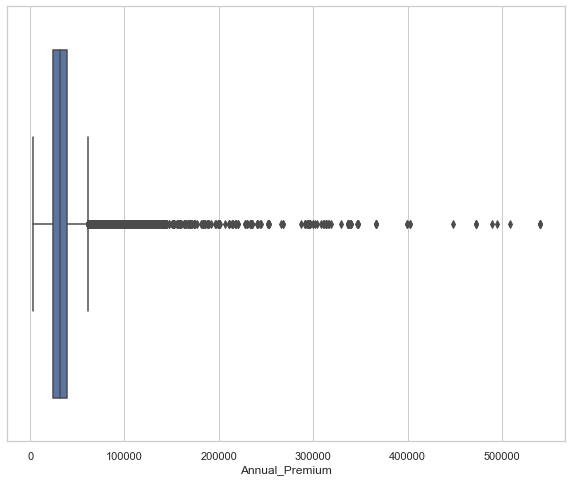

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Annual_Premium', data=df, orient="v")

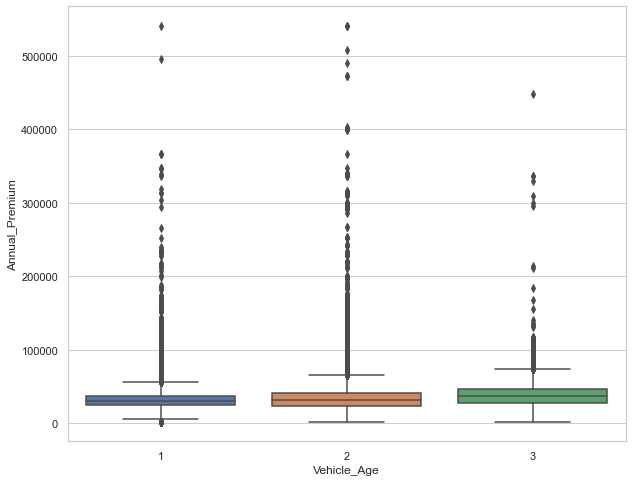

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Vehicle_Age', y='Annual_Premium', data=df, orient="v")

C:\Users\tariv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Annual_Premium'>

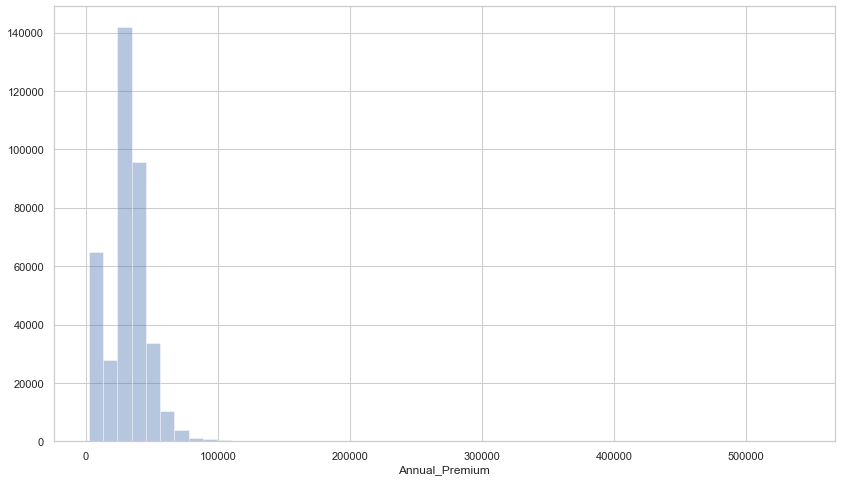

In [39]:
plt.figure(figsize=(14,8))
sns.distplot(df['Annual_Premium'], kde=False)

In [40]:
df.shape

(381109, 12)

In [41]:
# y.shape

<AxesSubplot: ylabel='Insurance'>

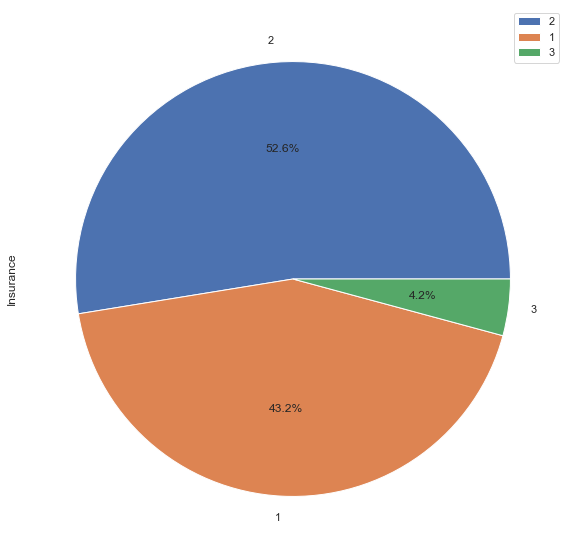

In [42]:
Vehicle_Age = df['Vehicle_Age'].value_counts()
df2 = pd.DataFrame({'Insurance': Vehicle_Age}, 
                           )
df2.plot.pie(y='Insurance', figsize=(10,10), autopct='%1.1f%%')

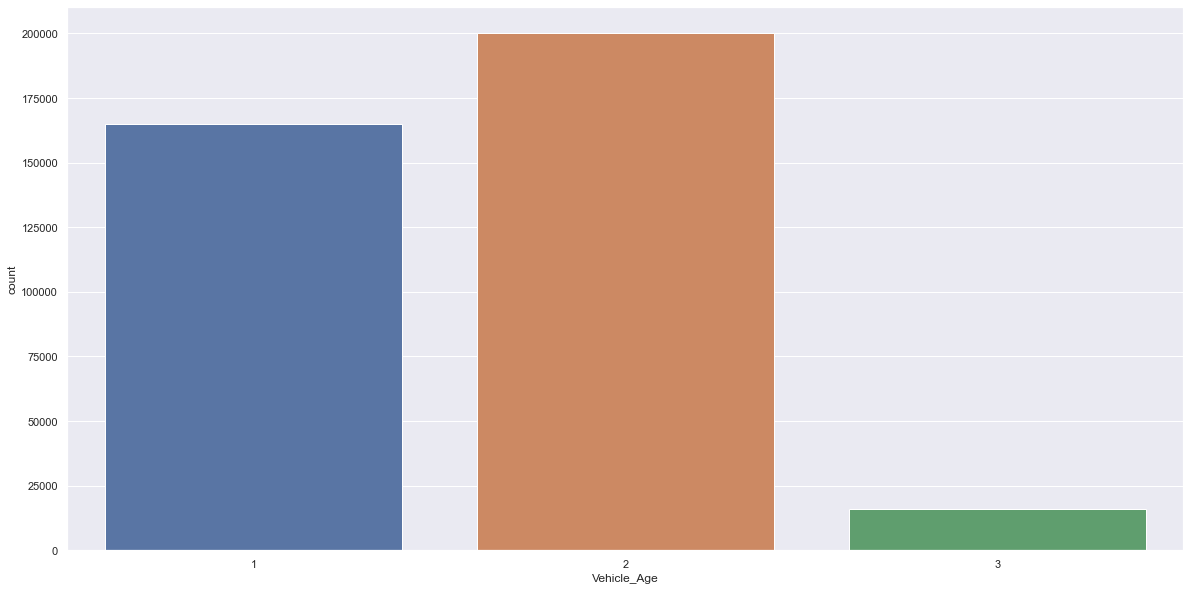

In [43]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Vehicle_Age', data=df)

In [44]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
X_train.shape

(285831, 11)

In [48]:
y_train.shape

(285831,)

In [53]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [56]:
y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.values.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

In [58]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[83569    34]
 [11649    26]]


0.8773798778311888